In [1]:
%load_ext autoreload
%autoreload 2

import ribo_util
import ribo_main
import ribo_analysis
import ribo_plot


library_creator = 'DG'        #FM, KS, CW, Menkin, Li, etc...
organism        = 'Volcanii'      #Coli, Subtilis, Tuberculosis, Salmonella etc...

inputs = {}
#inputs['files']        = ['CW63']
inputs['files']        = [library_creator + str(i) for i in range(1, 2)]

# CPU information for multithreading applications
inputs['multiprocess'] = 'yes'
inputs['threads']      = 8   
inputs['cores']        = 4

# paths containing densities and annotations
path_pc     = '/Volumes/Diego_2TB/ribosome_profiling_final_libs/libraries/H98_WT_ctrl/'
inpath      = path_pc + 'reads/'
path_script = '/Users/DRG/Desktop/ribosome_profiling_first_library/2nd_libraries/leucine_analysis/scripts/'

paths_in = {}
paths_in['path_gff_dict'] = path_pc + 'annotations/'+organism+'/'+organism+'_dict' 

paths_out = {}
paths_out['path_density']      = inpath  + 'density/density/'
paths_out['path_log']          = inpath  + 'density/logs/'
paths_out['path_analysis_log'] = inpath  + 'analysis/logs/'
paths_out['path_analysis']     = inpath  + 'analysis/individual/'
paths_out['path_figures']      = inpath  + 'figures/'


# Check inputs, create output paths
step = 'analysis'
ribo_util.check_inputs(inputs, paths_out, step)
ribo_util.createpath(inputs, paths_out)

In [2]:
settings = {}
settings['minlength'] = 10
settings['maxlength'] = 40
settings['shift']     = 11
settings['gff_extra'] = 50
settings['alignment'] = '3'

In [3]:
if not 'gff_dict' in globals(): 
    gff_dict, plus_dict, minus_dict = ribo_util.loadlargePickles(inputs, settings, paths_in, paths_out)

In [4]:
settings['length_out_ORF']  = 50
settings['length_in_ORF']   = 200        # genes shorter than this are excluded
settings['density_type']    = 'reads'    # 'reads' or 'rpm' 
settings['equal_weight']    = 'yes'      # 'yes' or 'no', if yes, change density_type to reads -- faster
settings['next_gene']       = 50         # genes closer than this are removed from start and stop, or 'no'
settings['threshold']       = 20       # RPKM, genes below will be removed from average


settings['subgroup'] = 'none'    #provide list of genes or 'none'

In [5]:
average_gene       = ribo_analysis.avggenes(inputs, paths_out, settings, gff_dict, plus_dict, minus_dict)
asymmetry_analysis = ribo_analysis.asymmetry(inputs, paths_out, settings, gff_dict, plus_dict, minus_dict)
frame_analysis     = ribo_analysis.frame(inputs, paths_out, settings, gff_dict, plus_dict, minus_dict)

Started avggenes at 2020-02-24 23:39:14.153414
	For DG1: 1212 out of 2912 genes in average.
	    - genes failing distance cutoff = 847
	    - genes failing length cutoff   = 121
	    - genes failing RPM cutoff      = 732
	    - genes in blacklist            = 0
31
Finished avggenes at 2020-02-24 23:39:52.724969
Started asymmetry analysis at 2020-02-24 23:39:52.728115


ribo_analysis.py:1285: RuntimeWarning:

divide by zero encountered in log2



Finished asymmetry analysis at 2020-02-24 23:39:55.038925
Started frame analysis at 2020-02-24 23:39:55.039218
Finished frame analysis at 2020-02-24 23:40:12.715249


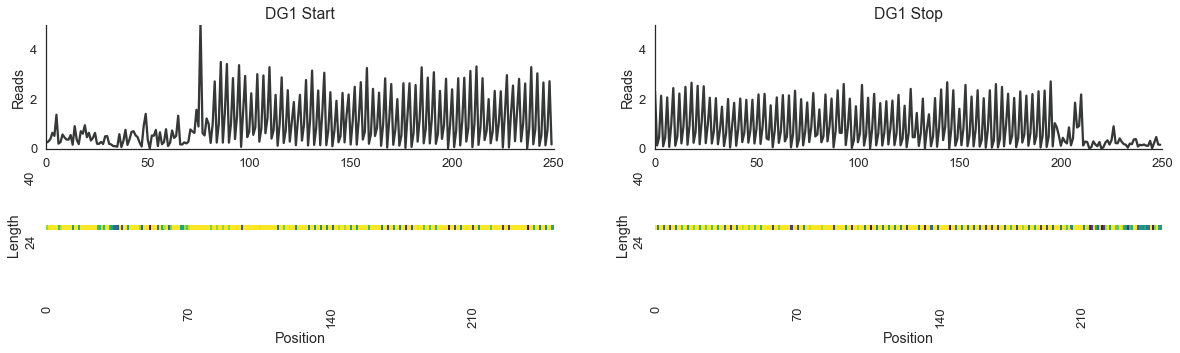

In [11]:
settings_plot = {}
settings_plot['HM_max'] = 0.3
settings_plot['ymax']   = 5 # set to 0 for autoscaling
settings_plot['shift']  = 1

average_plot = ribo_plot.plot_avggene(inputs, paths_in, paths_out, settings, settings_plot)

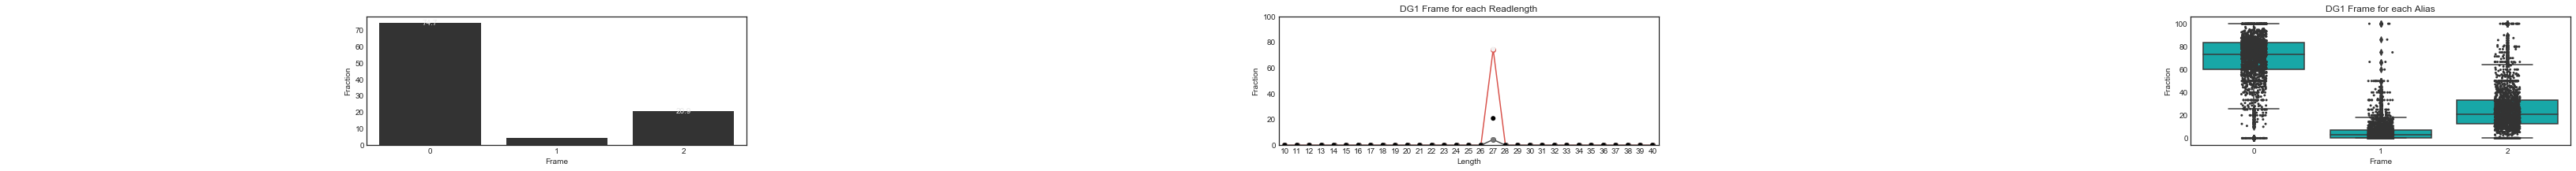

In [7]:
frame_plot = ribo_plot.plot_frame(inputs, paths_in, paths_out, settings, settings_plot)

In [8]:
settings['A_site shift']    = -11
settings['plot_upstream']   = 40
settings['plot_downstream'] = 50
settings['start_trim']      = 50
settings['stop_trim']       = 20
settings['frameshift']      = 0
settings['motif_length']    = 9
settings['next_codon']      = 'no'

#motif_analysis = ribo_analysis.motif_pausescore(inputs, paths_out, settings, gff_dict, plus_dict, minus_dict)
pausescore_analysis = ribo_analysis.pausescore(inputs, paths_out, settings, gff_dict, plus_dict, minus_dict)

Started pause score analysis at 2020-02-24 23:40:21.583925


Process Process-3:
Traceback (most recent call last):
  File "/Users/DRG/miniconda2/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
    self.run()
  File "/Users/DRG/miniconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
  File "ribo_analysis.py", line 982, in run_pausescore
    aa_seq     = [codon_code[codon] for codon in codons_seq]
KeyError: '???'


Finished pause score analysis at 2020-02-24 23:40:21.629443


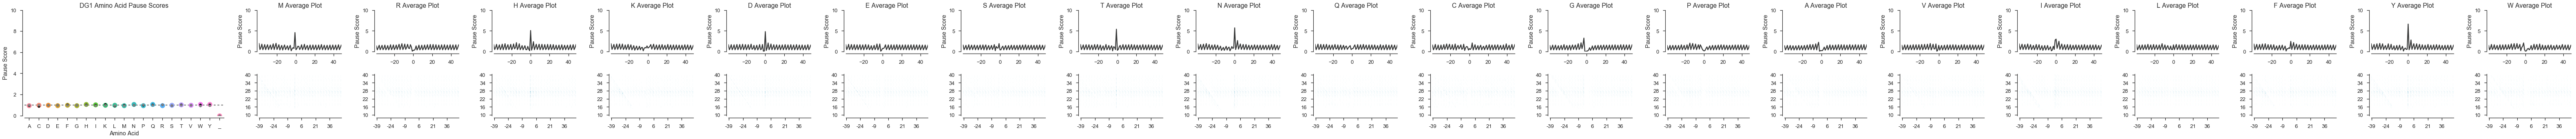

In [9]:
settings_plot['aa_or_codon'] = 'aa' 
settings_plot['amino_acid']  = ['M','R','H','K','D','E','S','T','N','Q','C','G','P','A','V','I','L','F','Y','W']
settings_plot['codon']       = ['ATG','GTG','TTG','CCA','CGA','ATA','GGC']

settings_plot['ymax_dot']  = 10
settings_plot['ymax_line'] = 10
settings_plot['vmax_HM']   = 10

plot_pausescore = ribo_plot.plot_pausescore(inputs, paths_in, paths_out, settings, settings_plot)

In [10]:
genelists = ribo_analysis.genelist(inputs, paths_out, settings, gff_dict, plus_dict, minus_dict)

Started genelist analysis at 2020-02-24 23:40:55.762960


KeyError: 'SD_affinity'

In [ ]:
plot_pausescore = ribo_plot.plot_asymmetry_comp(inputs, paths_in, paths_out, settings)